In [28]:
from astropy.io import fits
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import sys
import os
import glob
sys.path.append('/dark/bostroem/research/ASASSN15oz/code')
import spectroscopy as spec

In [29]:
DATA_DIR = '../data/EFOSC/20151108_test'
FIG_DIR = '../figures'

In [17]:
def check_wavelength_calibration(flist, savefile_prefix):
    plt.ioff()
    hydrogen_lines = [4340.47, 4861.33, 6562.799]
    fig = plt.figure(figsize = [15, 7])
    ax_Hgamma = fig.add_subplot(1, 3, 1)
    ax_Hbeta = fig.add_subplot(1, 3, 2)
    ax_Halpha = fig.add_subplot(1, 3, 3)
    ax_list = [ax_Hgamma, ax_Hbeta, ax_Halpha]
    for ifile in flist:
        ofile = fits.open(ifile)
        hdr = ofile[0].header
        tbdata = ofile[0].data
        wl = spec.calc_wavelength(hdr, np.arange(tbdata.shape[2]))
        for ax, iline in zip(ax_list, hydrogen_lines):
            ax.plot(wl, tbdata[0,0,:], label = hdr['date-obs'])
            ax.set_xlim(iline-50, iline+50)
            ax.axvline(iline, color = 'k')
            plotted_array = tbdata[0,0,:][(wl>iline-50)&(wl<iline+50)]
            if len(plotted_array) != 0:
                if ifile != flist[0]:
                    if plotted_array.max() > ax.get_ylim()[1]:
                        ax.set_ylim(ymax=plotted_array.max()+100)
                    if plotted_array.min() < ax.get_ylim()[0]:
                        ax.set_ylim(ymin=plotted_array.min()-100)
                else:
                    ax.set_ylim(np.min(plotted_array)-100, np.max(plotted_array)+100)
            ax.minorticks_on()
            ax.grid(b=True, which='Both')
            ax.legend(loc = 'best')
    fig.suptitle(savefile_prefix)
    ax_Hgamma.set_title('H-Gamma')
    ax_Hbeta.set_title('H-Beta')
    ax_Halpha.set_title('H-Alpha')
    plt.savefig(os.path.join(FIG_DIR, '{}_wavelength_cal.pdf'.format(savefile_prefix.replace(' ', '_'))))
    plt.ion()

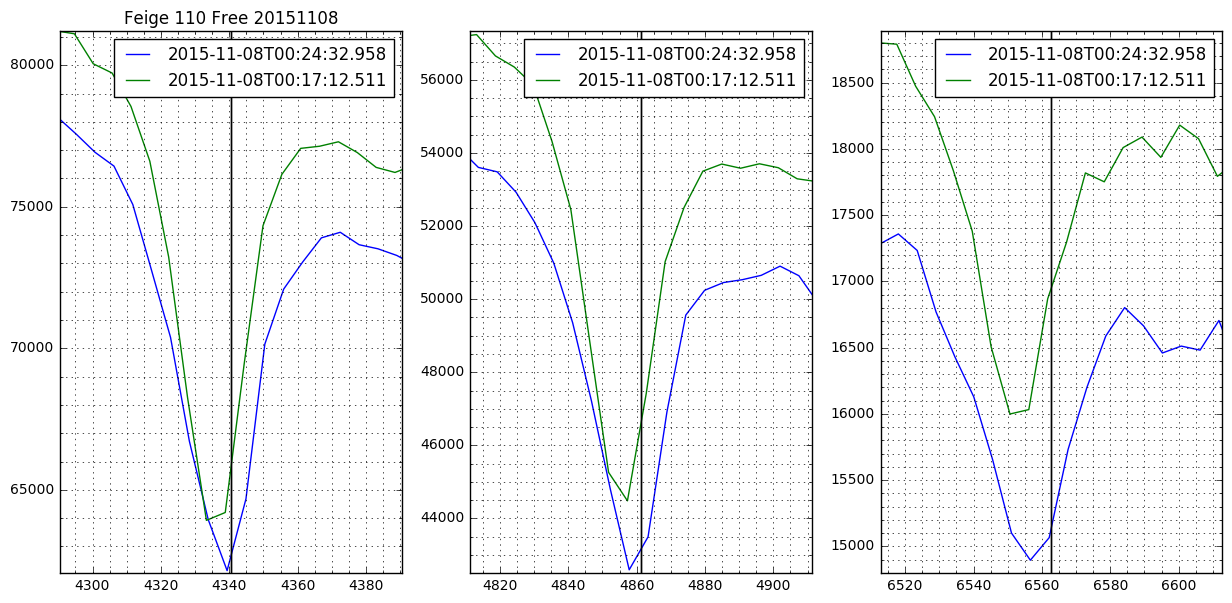

In [30]:
flist = glob.glob(os.path.join(DATA_DIR, 'tFeige*Free*ex.fits'))
check_wavelength_calibration(flist, 'Feige 110 Free 20151108')

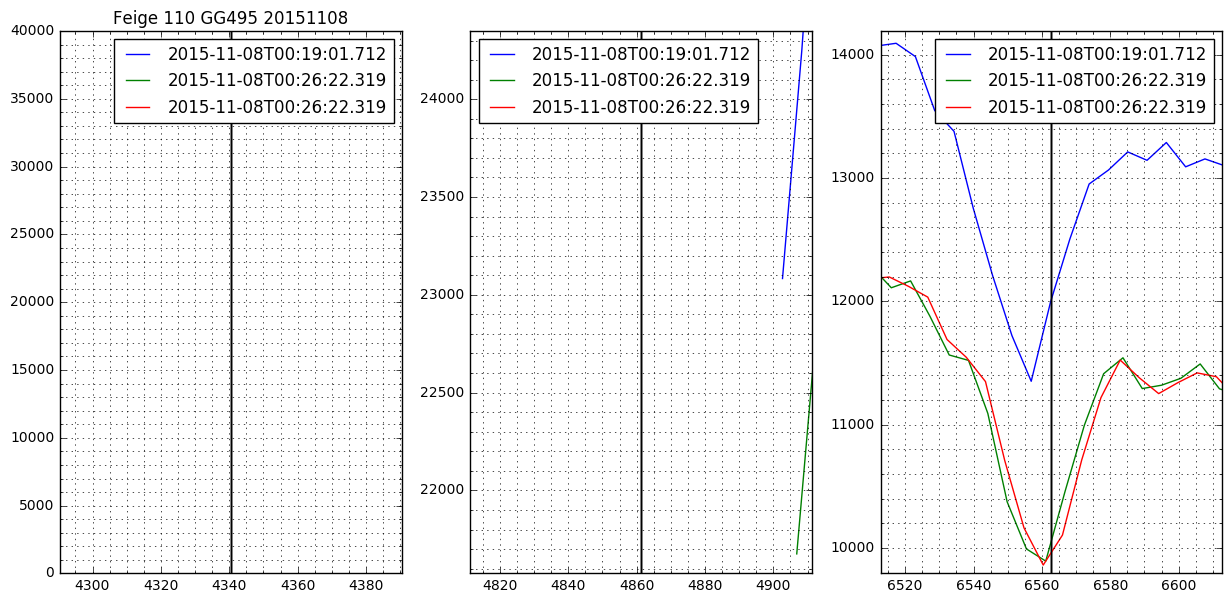

In [31]:
flist = glob.glob(os.path.join(DATA_DIR, 'tFeige*GG495*ex.fits'))
check_wavelength_calibration(flist, 'Feige 110 GG495 20151108')

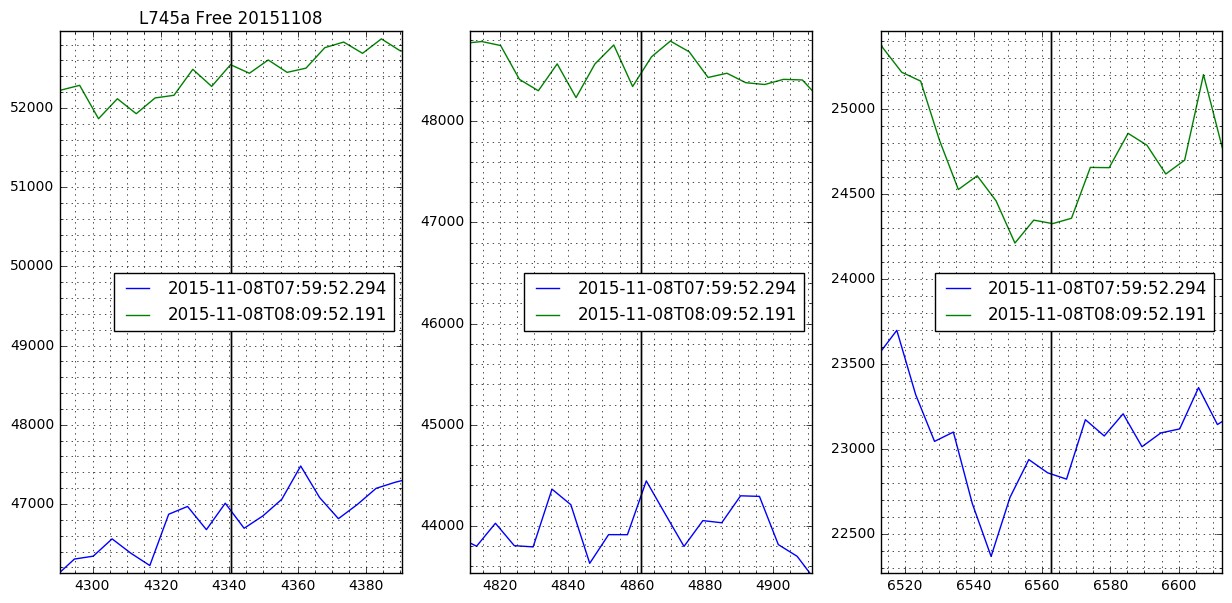

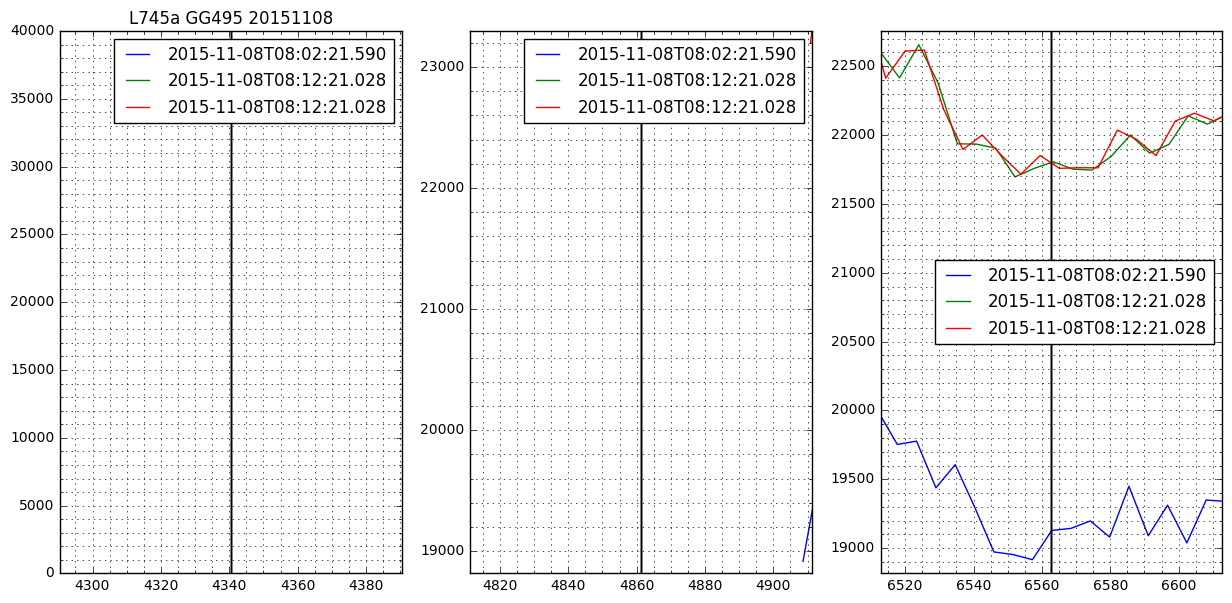

In [34]:
flist=glob.glob(os.path.join(DATA_DIR, 'tL745a*Free*ex.fits'))
check_wavelength_calibration(flist, 'L745a Free 20151108')
flist = glob.glob(os.path.join(DATA_DIR, 'tL745a*GG495*ex.fits'))
check_wavelength_calibration(flist, 'L745a GG495 20151108')

(5000, 30000)

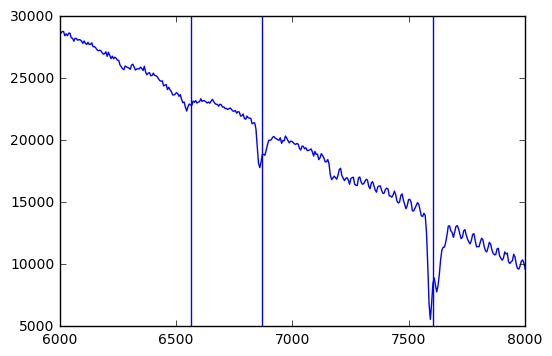

In [55]:
ofile = fits.open(os.path.join(DATA_DIR, 'tL745a_20151107_Gr13_Free_slit1.0_57685_1_ex.fits'))
tbdata = ofile[0].data
wl = calc_wavelength(ofile[0].header, np.arange(tbdata.shape[2]))
plt.plot(wl, ofile[0].data[0,0,:])
for iline in hydrogen_lines: plt.axvline(iline)
plt.axvline(6870)
plt.axvline(7605)
plt.xlim(6000, 8000)
plt.ylim(5000,30000)

# Check Nebular Spectra

In [21]:
DATA_DIR = '/Users/bostroem/macfusion/bostroem/research/ASASSN15oz/data/spectra/EFOSC/final/20160803_feige110'
flist = glob.glob(os.path.join(DATA_DIR, 'tFeige*Free*ex.fits'))
check_wavelength_calibration(flist, 'Feige 110 Free 20160803')

In [22]:
DATA_DIR = '/Users/bostroem/macfusion/bostroem/research/ASASSN15oz/data/spectra/EFOSC/final/20160411_LTT3864/'
flist = glob.glob(os.path.join(DATA_DIR, 'tLTT*Free*ex.fits'))
check_wavelength_calibration(flist, 'LTT 3846 Free 20160411')

# Check Sky Lines

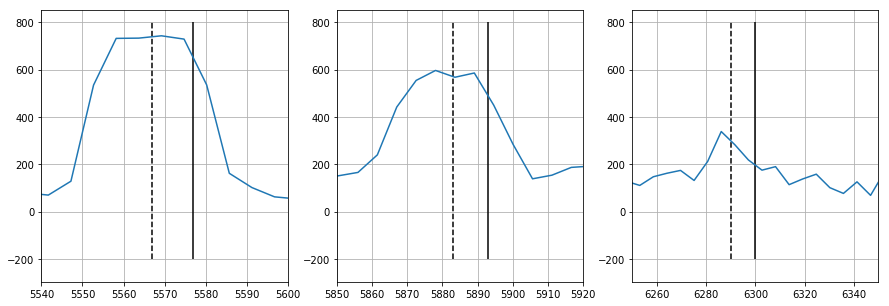

In [85]:
#sky_lines = [3700, 4400, 5580, 6708, 7750, 8990]
sky_lines = np.array([5577, 5893, 6300, 6364])
ofile = fits.open(flist[0])
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
sky_flux = ofile[0].data[2,0,:]
wl = spec.calc_wavelength(ofile[0].header, np.arange(1, len(sky_flux)+1))

ax1.plot(wl, sky_flux)
ax1.vlines(sky_lines, ymin=-200, ymax=800)
ax1.vlines(sky_lines-10, ymin=-200, ymax=800, linestyle='--')
ax1.set_xlim(5540, 5600)
ax1.grid()

ax2.plot(wl, sky_flux)
ax2.vlines(sky_lines, ymin=-200, ymax=800)
ax2.vlines(sky_lines-10, ymin=-200, ymax=800, linestyle='--')
ax2.set_xlim(5850, 5920)
ax2.grid()

ax3.plot(wl, sky_flux)
ax3.vlines(sky_lines, ymin=-200, ymax=800)
ax3.vlines(sky_lines-10, ymin=-200, ymax=800,  linestyle='--')
ax3.set_xlim(6250, 6350)
ax3.grid()

(7000, 9000)

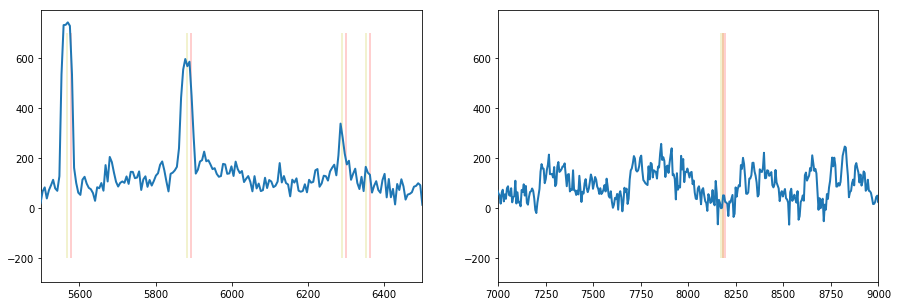

In [84]:
sky_lines = np.array([3650, 3663, 4358, 4978,4983, 5577, 5893, 6300, 6364, 6708, 8183, 8195])
             
#             6170.64, 6176.29, 6184.41, 6169.53, 6174.19, 6181.85, 
#             6257.97, 6265.22, 6275.60, 6256.94, 6262.73, 6272.30, 6498.72, 6504.99, 6513.99,
#             6497.52, 6502.66, 6511.09, 6863.94, 6870.98, 6881.07, 6862.68, 6868.39, 6877.79, 6144.48,
#            7276.41, 7284.45, 7295.95,7275.14, 7281.59, 7292.23,7523.99, 7530.71, 7540.38,7522.66, 7528.23,
#             7537.38, 7750.65, 7760.00, 7773.38, 7749.42, 7756.86, 7769.14,7913.71, 7921.12, 7931.77,7912.25,
#             7918.35, 7928.36]
ofile = fits.open(flist[0])
fig = plt.figure(figsize=[15, 5])
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sky_flux = ofile[0].data[2,0,:]
wl = spec.calc_wavelength(ofile[0].header, np.arange(1, len(sky_flux)+1))
ax1.vlines(sky_lines, ymin=-200, ymax=700, alpha=0.25, color='r')
ax1.vlines(sky_lines-10, ymin=-200, ymax=700, alpha=0.25, color='y')
ax1.plot(wl, sky_flux, zorder=100, lw=2)
ax1.set_xlim(5500, 6500)

ax2.vlines(sky_lines, ymin=-200, ymax=700, alpha=0.25, color='r')
ax2.vlines(sky_lines-10, ymin=-200, ymax=700, alpha=0.25, color='y')
ax2.plot(wl, sky_flux, zorder=100, lw=2)
ax2.set_xlim(7000, 9000)


(7000, 8000)

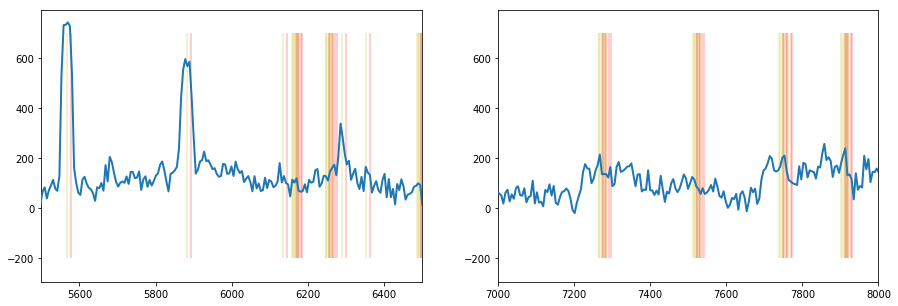

In [81]:
sky_lines = np.array([3650, 3663, 4358, 4978,4983, 5577, 5893, 6300, 6364, 6708, 8183, 8195,
             6170.64, 6176.29, 6184.41, 6169.53, 6174.19, 6181.85, 
             6257.97, 6265.22, 6275.60, 6256.94, 6262.73, 6272.30, 6498.72, 6504.99, 6513.99,
             6497.52, 6502.66, 6511.09, 6863.94, 6870.98, 6881.07, 6862.68, 6868.39, 6877.79, 6144.48,
            7276.41, 7284.45, 7295.95,7275.14, 7281.59, 7292.23,7523.99, 7530.71, 7540.38,7522.66, 7528.23,
             7537.38, 7750.65, 7760.00, 7773.38, 7749.42, 7756.86, 7769.14,7913.71, 7921.12, 7931.77,7912.25,
             7918.35, 7928.36])
ofile = fits.open(flist[0])
fig = plt.figure(figsize=[15, 5])
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sky_flux = ofile[0].data[2,0,:]
wl = spec.calc_wavelength(ofile[0].header, np.arange(1, len(sky_flux)+1))

ax1.vlines(sky_lines, ymin=-200, ymax=700, alpha=0.25, color='r')
ax1.vlines(sky_lines-10, ymin=-200, ymax=700, alpha=0.25, color='y')
ax1.plot(wl, sky_flux, zorder=100, lw=2)
ax1.set_xlim(5500, 6500)

ax2.vlines(sky_lines, ymin=-200, ymax=700, alpha=0.25, color='r')
ax2.vlines(sky_lines-10, ymin=-200, ymax=700, alpha=0.25, color='y')
ax2.plot(wl, sky_flux, zorder=100, lw=2)
ax2.set_xlim(7000, 8000)

In [68]:
ofile[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    3 / Number of axes                                 
NAXIS1  =                 1015 / Axis length                                    
NAXIS2  =                    1 / Axis length                                    
NAXIS3  =                    4 / Axis length                                    
EXTEND  =                    T / File may contain extensions                    
ORIGIN  = 'ESO     '           / European Southern Observatory                  
IRAF-TLM= '2016-12-01T21:52:25' / Time of last modification                     
DATE    = '2016-12-01T21:52:25' / UT date when this file was written            
TELESCOP= 'ESO-NTT '                    / ESO Telescope Name                    
INSTRUME= 'EFOSC   '                    / Instrument used.                      
OBJECT  = 'LTT3864 '        